In [3]:
from common import setup_imports
from constants import *
import os

setup_imports()

from pipeline import Pipeline

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload



utils.load_config:: Loaded config from /home/automatedtomato/github.com/automatedtomato/sar-yolo/config/006.yaml

utils.load_config:: Validated config: {'model': {'name': 'yolov3_sample_006', 'input_size': 416, 'n_classes': 0, 'grid_sizes': [13, 26, 52], 'anchors': [[[42.0, 27.0], [34.0, 58.0], [64.0, 35.0]], [[13.0, 25.0], [28.0, 20.0], [21.0, 38.0]], [[4.0, 6.0], [8.0, 14.0], [18.0, 13.0]]]}, 'data': {'bucket_name': 'sar-dataset', 'img_ext': '.png', 'annot_ext': '.txt', 'test': {'img_path': 'data/new_dataset3/test/images', 'annot_path': 'data/new_dataset3/test/labels'}, 'train': {'img_path': 'data/new_dataset3/train/images', 'annot_path': 'data/new_dataset3/train/labels'}, 'val': {'img_path': 'data/new_dataset3/val/images', 'annot_path': 'data/new_dataset3/val/labels'}, 'source': 'file', 'data_dir': '/home/automatedtomato/github.com/automatedtomato/sar-yolo/sar_dataset'}, 'dataloader': {'batch_size': 8, 'num_workers': 4, 'pin_memory': True}, 'training': {'log_interval': 10, 'accumul


utils.anchor_optim:: 
Running K-means clustering with 9 clusters...
Box dimensions statistics:
  Mean: [13.38696177 15.10813656]
  STD: [11.99907526 10.61897323]
  Min: [0.080288 0.13936 ]
  Max: [182.633984 120.709888]

Calculated anchors:
  Scale 0: [[37.0, 24.0], [29.0, 50.0], [55.0, 30.0]]
  Scale 1: [[11.0, 22.0], [24.0, 17.0], [19.0, 33.0]]
  Scale 2: [[4.0, 5.0], [7.0, 12.0], [15.0, 11.0]]

utils.anchor_optim:: Updated anchors in config file: /home/automatedtomato/github.com/automatedtomato/sar-yolo/config/006.yaml

utils.load_config:: Loaded config from /home/automatedtomato/github.com/automatedtomato/sar-yolo/config/006.yaml

data.dataset.data_loader:: Train Samples: 612, Val Samples: 204, Test Samples: 204

pipeline.pipeline:: Data transforms are applied to the dataset. Total 612 images are used for training.

pipeline.pipeline:: Using device: cuda

models.train_val.train:: 
Training model...
  Number of epochs: 5
  Device: cuda
  Patience: 10
  Save path: 006_best_model.pt


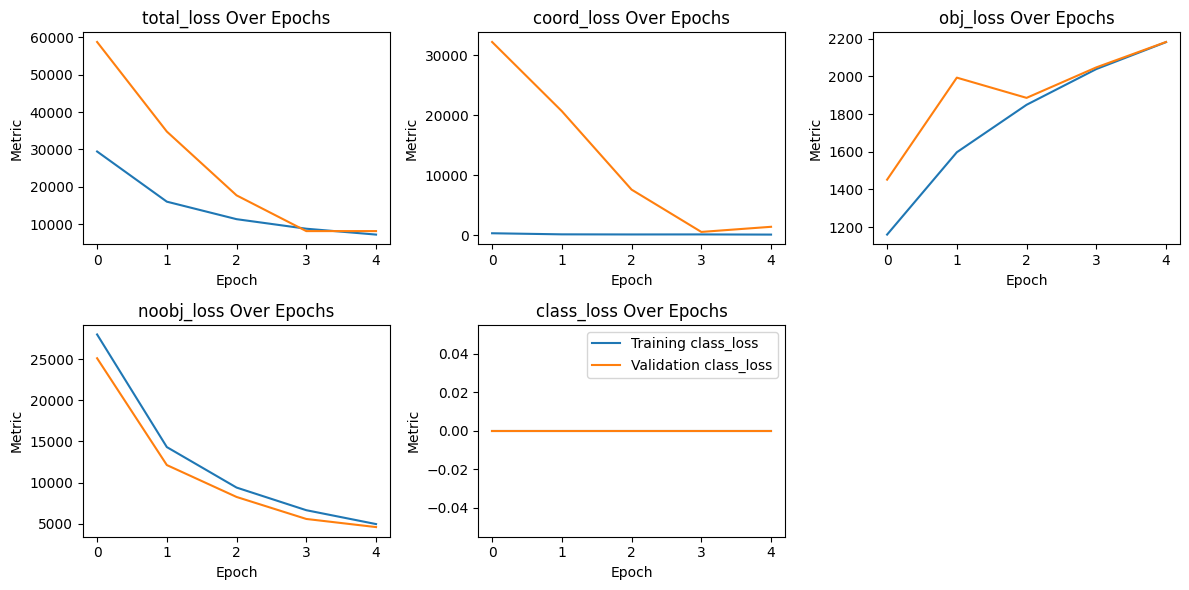


models.train_val.evaluation:: YOLOv3 evaluator initialized.

models.train_val.evaluation:: Evaluating model...


RuntimeError: The size of tensor a (115) must match the size of tensor b (127) at non-singleton dimension 0

In [4]:
pl = Pipeline(config_path=os.path.join(CONFIG_PATH, '006.yaml'))
metrics, model = pl.train_val_pipeline(optim_anchor=True, schedule_lr=True)

In [2]:
from models.train_val.evaluation import YOLOv3Evaluator
import torch
from utils import load_config

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
evaluator = YOLOv3Evaluator(device=device, config_path=os.path.join(CONFIG_PATH, '006.yaml'))

metrics, _ = evaluator.evaluate_saved_model(
    saved_model_path='006_best_model.pt'
)
metrics


utils.load_config:: Loaded config from /home/automatedtomato/github.com/automatedtomato/sar-yolo/config/006.yaml

models.train_val.evaluation:: YOLOv3 evaluator initialized.


RuntimeError: Error(s) in loading state_dict for YOLOv3:
	Missing key(s) in state_dict: "backbone.layer1.0.conv.weight", "backbone.layer1.0.bn.weight", "backbone.layer1.0.bn.bias", "backbone.layer1.0.bn.running_mean", "backbone.layer1.0.bn.running_var", "backbone.layer1.1.conv.weight", "backbone.layer1.1.bn.weight", "backbone.layer1.1.bn.bias", "backbone.layer1.1.bn.running_mean", "backbone.layer1.1.bn.running_var", "backbone.layer1.2.layers.0.0.weight", "backbone.layer1.2.layers.0.0.bias", "backbone.layer1.2.layers.0.1.weight", "backbone.layer1.2.layers.0.1.bias", "backbone.layer1.2.layers.0.1.running_mean", "backbone.layer1.2.layers.0.1.running_var", "backbone.layer1.2.layers.0.3.weight", "backbone.layer1.2.layers.0.3.bias", "backbone.layer1.2.layers.0.4.weight", "backbone.layer1.2.layers.0.4.bias", "backbone.layer1.2.layers.0.4.running_mean", "backbone.layer1.2.layers.0.4.running_var", "backbone.layer1.3.conv.weight", "backbone.layer1.3.bn.weight", "backbone.layer1.3.bn.bias", "backbone.layer1.3.bn.running_mean", "backbone.layer1.3.bn.running_var", "backbone.layer1.4.layers.0.0.weight", "backbone.layer1.4.layers.0.0.bias", "backbone.layer1.4.layers.0.1.weight", "backbone.layer1.4.layers.0.1.bias", "backbone.layer1.4.layers.0.1.running_mean", "backbone.layer1.4.layers.0.1.running_var", "backbone.layer1.4.layers.0.3.weight", "backbone.layer1.4.layers.0.3.bias", "backbone.layer1.4.layers.0.4.weight", "backbone.layer1.4.layers.0.4.bias", "backbone.layer1.4.layers.0.4.running_mean", "backbone.layer1.4.layers.0.4.running_var", "backbone.layer1.4.layers.1.0.weight", "backbone.layer1.4.layers.1.0.bias", "backbone.layer1.4.layers.1.1.weight", "backbone.layer1.4.layers.1.1.bias", "backbone.layer1.4.layers.1.1.running_mean", "backbone.layer1.4.layers.1.1.running_var", "backbone.layer1.4.layers.1.3.weight", "backbone.layer1.4.layers.1.3.bias", "backbone.layer1.4.layers.1.4.weight", "backbone.layer1.4.layers.1.4.bias", "backbone.layer1.4.layers.1.4.running_mean", "backbone.layer1.4.layers.1.4.running_var", "backbone.layer1.5.conv.weight", "backbone.layer1.5.bn.weight", "backbone.layer1.5.bn.bias", "backbone.layer1.5.bn.running_mean", "backbone.layer1.5.bn.running_var", "backbone.layer1.6.layers.0.0.weight", "backbone.layer1.6.layers.0.0.bias", "backbone.layer1.6.layers.0.1.weight", "backbone.layer1.6.layers.0.1.bias", "backbone.layer1.6.layers.0.1.running_mean", "backbone.layer1.6.layers.0.1.running_var", "backbone.layer1.6.layers.0.3.weight", "backbone.layer1.6.layers.0.3.bias", "backbone.layer1.6.layers.0.4.weight", "backbone.layer1.6.layers.0.4.bias", "backbone.layer1.6.layers.0.4.running_mean", "backbone.layer1.6.layers.0.4.running_var", "backbone.layer1.6.layers.1.0.weight", "backbone.layer1.6.layers.1.0.bias", "backbone.layer1.6.layers.1.1.weight", "backbone.layer1.6.layers.1.1.bias", "backbone.layer1.6.layers.1.1.running_mean", "backbone.layer1.6.layers.1.1.running_var", "backbone.layer1.6.layers.1.3.weight", "backbone.layer1.6.layers.1.3.bias", "backbone.layer1.6.layers.1.4.weight", "backbone.layer1.6.layers.1.4.bias", "backbone.layer1.6.layers.1.4.running_mean", "backbone.layer1.6.layers.1.4.running_var", "backbone.layer1.6.layers.2.0.weight", "backbone.layer1.6.layers.2.0.bias", "backbone.layer1.6.layers.2.1.weight", "backbone.layer1.6.layers.2.1.bias", "backbone.layer1.6.layers.2.1.running_mean", "backbone.layer1.6.layers.2.1.running_var", "backbone.layer1.6.layers.2.3.weight", "backbone.layer1.6.layers.2.3.bias", "backbone.layer1.6.layers.2.4.weight", "backbone.layer1.6.layers.2.4.bias", "backbone.layer1.6.layers.2.4.running_mean", "backbone.layer1.6.layers.2.4.running_var", "backbone.layer1.6.layers.3.0.weight", "backbone.layer1.6.layers.3.0.bias", "backbone.layer1.6.layers.3.1.weight", "backbone.layer1.6.layers.3.1.bias", "backbone.layer1.6.layers.3.1.running_mean", "backbone.layer1.6.layers.3.1.running_var", "backbone.layer1.6.layers.3.3.weight", "backbone.layer1.6.layers.3.3.bias", "backbone.layer1.6.layers.3.4.weight", "backbone.layer1.6.layers.3.4.bias", "backbone.layer1.6.layers.3.4.running_mean", "backbone.layer1.6.layers.3.4.running_var", "backbone.layer1.6.layers.4.0.weight", "backbone.layer1.6.layers.4.0.bias", "backbone.layer1.6.layers.4.1.weight", "backbone.layer1.6.layers.4.1.bias", "backbone.layer1.6.layers.4.1.running_mean", "backbone.layer1.6.layers.4.1.running_var", "backbone.layer1.6.layers.4.3.weight", "backbone.layer1.6.layers.4.3.bias", "backbone.layer1.6.layers.4.4.weight", "backbone.layer1.6.layers.4.4.bias", "backbone.layer1.6.layers.4.4.running_mean", "backbone.layer1.6.layers.4.4.running_var", "backbone.layer1.6.layers.5.0.weight", "backbone.layer1.6.layers.5.0.bias", "backbone.layer1.6.layers.5.1.weight", "backbone.layer1.6.layers.5.1.bias", "backbone.layer1.6.layers.5.1.running_mean", "backbone.layer1.6.layers.5.1.running_var", "backbone.layer1.6.layers.5.3.weight", "backbone.layer1.6.layers.5.3.bias", "backbone.layer1.6.layers.5.4.weight", "backbone.layer1.6.layers.5.4.bias", "backbone.layer1.6.layers.5.4.running_mean", "backbone.layer1.6.layers.5.4.running_var", "backbone.layer1.6.layers.6.0.weight", "backbone.layer1.6.layers.6.0.bias", "backbone.layer1.6.layers.6.1.weight", "backbone.layer1.6.layers.6.1.bias", "backbone.layer1.6.layers.6.1.running_mean", "backbone.layer1.6.layers.6.1.running_var", "backbone.layer1.6.layers.6.3.weight", "backbone.layer1.6.layers.6.3.bias", "backbone.layer1.6.layers.6.4.weight", "backbone.layer1.6.layers.6.4.bias", "backbone.layer1.6.layers.6.4.running_mean", "backbone.layer1.6.layers.6.4.running_var", "backbone.layer1.6.layers.7.0.weight", "backbone.layer1.6.layers.7.0.bias", "backbone.layer1.6.layers.7.1.weight", "backbone.layer1.6.layers.7.1.bias", "backbone.layer1.6.layers.7.1.running_mean", "backbone.layer1.6.layers.7.1.running_var", "backbone.layer1.6.layers.7.3.weight", "backbone.layer1.6.layers.7.3.bias", "backbone.layer1.6.layers.7.4.weight", "backbone.layer1.6.layers.7.4.bias", "backbone.layer1.6.layers.7.4.running_mean", "backbone.layer1.6.layers.7.4.running_var", "backbone.layer2.0.conv.weight", "backbone.layer2.0.bn.weight", "backbone.layer2.0.bn.bias", "backbone.layer2.0.bn.running_mean", "backbone.layer2.0.bn.running_var", "backbone.layer2.1.layers.0.0.weight", "backbone.layer2.1.layers.0.0.bias", "backbone.layer2.1.layers.0.1.weight", "backbone.layer2.1.layers.0.1.bias", "backbone.layer2.1.layers.0.1.running_mean", "backbone.layer2.1.layers.0.1.running_var", "backbone.layer2.1.layers.0.3.weight", "backbone.layer2.1.layers.0.3.bias", "backbone.layer2.1.layers.0.4.weight", "backbone.layer2.1.layers.0.4.bias", "backbone.layer2.1.layers.0.4.running_mean", "backbone.layer2.1.layers.0.4.running_var", "backbone.layer2.1.layers.1.0.weight", "backbone.layer2.1.layers.1.0.bias", "backbone.layer2.1.layers.1.1.weight", "backbone.layer2.1.layers.1.1.bias", "backbone.layer2.1.layers.1.1.running_mean", "backbone.layer2.1.layers.1.1.running_var", "backbone.layer2.1.layers.1.3.weight", "backbone.layer2.1.layers.1.3.bias", "backbone.layer2.1.layers.1.4.weight", "backbone.layer2.1.layers.1.4.bias", "backbone.layer2.1.layers.1.4.running_mean", "backbone.layer2.1.layers.1.4.running_var", "backbone.layer2.1.layers.2.0.weight", "backbone.layer2.1.layers.2.0.bias", "backbone.layer2.1.layers.2.1.weight", "backbone.layer2.1.layers.2.1.bias", "backbone.layer2.1.layers.2.1.running_mean", "backbone.layer2.1.layers.2.1.running_var", "backbone.layer2.1.layers.2.3.weight", "backbone.layer2.1.layers.2.3.bias", "backbone.layer2.1.layers.2.4.weight", "backbone.layer2.1.layers.2.4.bias", "backbone.layer2.1.layers.2.4.running_mean", "backbone.layer2.1.layers.2.4.running_var", "backbone.layer2.1.layers.3.0.weight", "backbone.layer2.1.layers.3.0.bias", "backbone.layer2.1.layers.3.1.weight", "backbone.layer2.1.layers.3.1.bias", "backbone.layer2.1.layers.3.1.running_mean", "backbone.layer2.1.layers.3.1.running_var", "backbone.layer2.1.layers.3.3.weight", "backbone.layer2.1.layers.3.3.bias", "backbone.layer2.1.layers.3.4.weight", "backbone.layer2.1.layers.3.4.bias", "backbone.layer2.1.layers.3.4.running_mean", "backbone.layer2.1.layers.3.4.running_var", "backbone.layer2.1.layers.4.0.weight", "backbone.layer2.1.layers.4.0.bias", "backbone.layer2.1.layers.4.1.weight", "backbone.layer2.1.layers.4.1.bias", "backbone.layer2.1.layers.4.1.running_mean", "backbone.layer2.1.layers.4.1.running_var", "backbone.layer2.1.layers.4.3.weight", "backbone.layer2.1.layers.4.3.bias", "backbone.layer2.1.layers.4.4.weight", "backbone.layer2.1.layers.4.4.bias", "backbone.layer2.1.layers.4.4.running_mean", "backbone.layer2.1.layers.4.4.running_var", "backbone.layer2.1.layers.5.0.weight", "backbone.layer2.1.layers.5.0.bias", "backbone.layer2.1.layers.5.1.weight", "backbone.layer2.1.layers.5.1.bias", "backbone.layer2.1.layers.5.1.running_mean", "backbone.layer2.1.layers.5.1.running_var", "backbone.layer2.1.layers.5.3.weight", "backbone.layer2.1.layers.5.3.bias", "backbone.layer2.1.layers.5.4.weight", "backbone.layer2.1.layers.5.4.bias", "backbone.layer2.1.layers.5.4.running_mean", "backbone.layer2.1.layers.5.4.running_var", "backbone.layer2.1.layers.6.0.weight", "backbone.layer2.1.layers.6.0.bias", "backbone.layer2.1.layers.6.1.weight", "backbone.layer2.1.layers.6.1.bias", "backbone.layer2.1.layers.6.1.running_mean", "backbone.layer2.1.layers.6.1.running_var", "backbone.layer2.1.layers.6.3.weight", "backbone.layer2.1.layers.6.3.bias", "backbone.layer2.1.layers.6.4.weight", "backbone.layer2.1.layers.6.4.bias", "backbone.layer2.1.layers.6.4.running_mean", "backbone.layer2.1.layers.6.4.running_var", "backbone.layer2.1.layers.7.0.weight", "backbone.layer2.1.layers.7.0.bias", "backbone.layer2.1.layers.7.1.weight", "backbone.layer2.1.layers.7.1.bias", "backbone.layer2.1.layers.7.1.running_mean", "backbone.layer2.1.layers.7.1.running_var", "backbone.layer2.1.layers.7.3.weight", "backbone.layer2.1.layers.7.3.bias", "backbone.layer2.1.layers.7.4.weight", "backbone.layer2.1.layers.7.4.bias", "backbone.layer2.1.layers.7.4.running_mean", "backbone.layer2.1.layers.7.4.running_var", "backbone.layer3.0.conv.weight", "backbone.layer3.0.bn.weight", "backbone.layer3.0.bn.bias", "backbone.layer3.0.bn.running_mean", "backbone.layer3.0.bn.running_var", "backbone.layer3.1.layers.0.0.weight", "backbone.layer3.1.layers.0.0.bias", "backbone.layer3.1.layers.0.1.weight", "backbone.layer3.1.layers.0.1.bias", "backbone.layer3.1.layers.0.1.running_mean", "backbone.layer3.1.layers.0.1.running_var", "backbone.layer3.1.layers.0.3.weight", "backbone.layer3.1.layers.0.3.bias", "backbone.layer3.1.layers.0.4.weight", "backbone.layer3.1.layers.0.4.bias", "backbone.layer3.1.layers.0.4.running_mean", "backbone.layer3.1.layers.0.4.running_var", "backbone.layer3.1.layers.1.0.weight", "backbone.layer3.1.layers.1.0.bias", "backbone.layer3.1.layers.1.1.weight", "backbone.layer3.1.layers.1.1.bias", "backbone.layer3.1.layers.1.1.running_mean", "backbone.layer3.1.layers.1.1.running_var", "backbone.layer3.1.layers.1.3.weight", "backbone.layer3.1.layers.1.3.bias", "backbone.layer3.1.layers.1.4.weight", "backbone.layer3.1.layers.1.4.bias", "backbone.layer3.1.layers.1.4.running_mean", "backbone.layer3.1.layers.1.4.running_var", "backbone.layer3.1.layers.2.0.weight", "backbone.layer3.1.layers.2.0.bias", "backbone.layer3.1.layers.2.1.weight", "backbone.layer3.1.layers.2.1.bias", "backbone.layer3.1.layers.2.1.running_mean", "backbone.layer3.1.layers.2.1.running_var", "backbone.layer3.1.layers.2.3.weight", "backbone.layer3.1.layers.2.3.bias", "backbone.layer3.1.layers.2.4.weight", "backbone.layer3.1.layers.2.4.bias", "backbone.layer3.1.layers.2.4.running_mean", "backbone.layer3.1.layers.2.4.running_var", "backbone.layer3.1.layers.3.0.weight", "backbone.layer3.1.layers.3.0.bias", "backbone.layer3.1.layers.3.1.weight", "backbone.layer3.1.layers.3.1.bias", "backbone.layer3.1.layers.3.1.running_mean", "backbone.layer3.1.layers.3.1.running_var", "backbone.layer3.1.layers.3.3.weight", "backbone.layer3.1.layers.3.3.bias", "backbone.layer3.1.layers.3.4.weight", "backbone.layer3.1.layers.3.4.bias", "backbone.layer3.1.layers.3.4.running_mean", "backbone.layer3.1.layers.3.4.running_var", "head.predict_1.0.conv.weight", "head.predict_1.0.bn.weight", "head.predict_1.0.bn.bias", "head.predict_1.0.bn.running_mean", "head.predict_1.0.bn.running_var", "head.predict_1.1.conv.weight", "head.predict_1.1.bn.weight", "head.predict_1.1.bn.bias", "head.predict_1.1.bn.running_mean", "head.predict_1.1.bn.running_var", "head.predict_1.2.layers.0.0.weight", "head.predict_1.2.layers.0.0.bias", "head.predict_1.2.layers.0.1.weight", "head.predict_1.2.layers.0.1.bias", "head.predict_1.2.layers.0.1.running_mean", "head.predict_1.2.layers.0.1.running_var", "head.predict_1.2.layers.0.3.weight", "head.predict_1.2.layers.0.3.bias", "head.predict_1.2.layers.0.4.weight", "head.predict_1.2.layers.0.4.bias", "head.predict_1.2.layers.0.4.running_mean", "head.predict_1.2.layers.0.4.running_var", "head.predict_1.3.conv.weight", "head.predict_1.3.bn.weight", "head.predict_1.3.bn.bias", "head.predict_1.3.bn.running_mean", "head.predict_1.3.bn.running_var", "head.scale_pred_1.pred.0.weight", "head.scale_pred_1.pred.0.bias", "head.scale_pred_1.pred.1.weight", "head.scale_pred_1.pred.1.bias", "head.scale_pred_1.pred.1.running_mean", "head.scale_pred_1.pred.1.running_var", "head.scale_pred_1.pred.3.weight", "head.scale_pred_1.pred.3.bias", "head.upsample_1.0.conv.weight", "head.upsample_1.0.bn.weight", "head.upsample_1.0.bn.bias", "head.upsample_1.0.bn.running_mean", "head.upsample_1.0.bn.running_var", "head.predict_2.0.conv.weight", "head.predict_2.0.bn.weight", "head.predict_2.0.bn.bias", "head.predict_2.0.bn.running_mean", "head.predict_2.0.bn.running_var", "head.predict_2.1.conv.weight", "head.predict_2.1.bn.weight", "head.predict_2.1.bn.bias", "head.predict_2.1.bn.running_mean", "head.predict_2.1.bn.running_var", "head.predict_2.2.layers.0.0.weight", "head.predict_2.2.layers.0.0.bias", "head.predict_2.2.layers.0.1.weight", "head.predict_2.2.layers.0.1.bias", "head.predict_2.2.layers.0.1.running_mean", "head.predict_2.2.layers.0.1.running_var", "head.predict_2.2.layers.0.3.weight", "head.predict_2.2.layers.0.3.bias", "head.predict_2.2.layers.0.4.weight", "head.predict_2.2.layers.0.4.bias", "head.predict_2.2.layers.0.4.running_mean", "head.predict_2.2.layers.0.4.running_var", "head.predict_2.3.conv.weight", "head.predict_2.3.bn.weight", "head.predict_2.3.bn.bias", "head.predict_2.3.bn.running_mean", "head.predict_2.3.bn.running_var", "head.scale_pred_2.pred.0.weight", "head.scale_pred_2.pred.0.bias", "head.scale_pred_2.pred.1.weight", "head.scale_pred_2.pred.1.bias", "head.scale_pred_2.pred.1.running_mean", "head.scale_pred_2.pred.1.running_var", "head.scale_pred_2.pred.3.weight", "head.scale_pred_2.pred.3.bias", "head.upsample_2.0.conv.weight", "head.upsample_2.0.bn.weight", "head.upsample_2.0.bn.bias", "head.upsample_2.0.bn.running_mean", "head.upsample_2.0.bn.running_var", "head.predict_3.0.conv.weight", "head.predict_3.0.bn.weight", "head.predict_3.0.bn.bias", "head.predict_3.0.bn.running_mean", "head.predict_3.0.bn.running_var", "head.predict_3.1.conv.weight", "head.predict_3.1.bn.weight", "head.predict_3.1.bn.bias", "head.predict_3.1.bn.running_mean", "head.predict_3.1.bn.running_var", "head.predict_3.2.layers.0.0.weight", "head.predict_3.2.layers.0.0.bias", "head.predict_3.2.layers.0.1.weight", "head.predict_3.2.layers.0.1.bias", "head.predict_3.2.layers.0.1.running_mean", "head.predict_3.2.layers.0.1.running_var", "head.predict_3.2.layers.0.3.weight", "head.predict_3.2.layers.0.3.bias", "head.predict_3.2.layers.0.4.weight", "head.predict_3.2.layers.0.4.bias", "head.predict_3.2.layers.0.4.running_mean", "head.predict_3.2.layers.0.4.running_var", "head.predict_3.3.conv.weight", "head.predict_3.3.bn.weight", "head.predict_3.3.bn.bias", "head.predict_3.3.bn.running_mean", "head.predict_3.3.bn.running_var", "head.scale_pred_3.pred.0.weight", "head.scale_pred_3.pred.0.bias", "head.scale_pred_3.pred.1.weight", "head.scale_pred_3.pred.1.bias", "head.scale_pred_3.pred.1.running_mean", "head.scale_pred_3.pred.1.running_var", "head.scale_pred_3.pred.3.weight", "head.scale_pred_3.pred.3.bias". 
	Unexpected key(s) in state_dict: "epoch", "model_state_dict", "optimizer_state_dict", "best_val_loss", "config". 

### Saving metrics test

In [91]:
metrics.pop('datetime')
metrics

{'model': 'yolov3_sample_006',
 'n_epochs': 1,
 'learning_rate': 0.01,
 'weight_decay': 0.0005,
 'batch_size': 8,
 'accumulation_steps': 1,
 'total_loss': 4079.8857,
 'mAP': 0.0,
 'mAP_0.3': 0.0,
 'precision': 0.0,
 'recall': 0.0,
 'recall_0.3': 0.0,
 'IoU': 0.0,
 'f1_score': 0.0,
 'n_preds': 0,
 'n_ground_truths': 41818}

In [85]:
import pandas as pd
df = pd.read_csv('../metrics/metrics.csv')
df

,datetime,model,n_epochs,learning_rate,weight_decay,batch_size,accumulation_steps,total_loss,mAP,mAP_0.3,precision,recall,recall_0.3,IoU,f1_score,n_preds,n_ground_truths
0,2025-06-10 16:04:58,sample,1,0.01,0.0005,8,1,5000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,40000


In [86]:
from datetime import datetime
metrics['datetime'] = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
metrics

{'model': 'yolov3_sample_006',
 'n_epochs': 1,
 'learning_rate': 0.01,
 'weight_decay': 0.0005,
 'batch_size': 8,
 'accumulation_steps': 1,
 'total_loss': 4079.8857,
 'mAP': 0.0,
 'mAP_0.3': 0.0,
 'precision': 0.0,
 'recall': 0.0,
 'recall_0.3': 0.0,
 'IoU': 0.0,
 'f1_score': 0.0,
 'n_preds': 0,
 'n_ground_truths': 41818,
 'datetime': '2025-06-10 17:21:14'}

In [87]:
metrics_df = pd.DataFrame(metrics, index=[0])
metrics_df

,model,n_epochs,learning_rate,weight_decay,batch_size,accumulation_steps,total_loss,mAP,mAP_0.3,precision,recall,recall_0.3,IoU,f1_score,n_preds,n_ground_truths,datetime
0,yolov3_sample_006,1,0.01,0.0005,8,1,4079.8857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,41818,2025-06-10 17:21:14


In [88]:
metrics_df = metrics_df[['datetime'] + [col for col in metrics_df.columns if col != 'datetime']]
metrics_df

,datetime,model,n_epochs,learning_rate,weight_decay,batch_size,accumulation_steps,total_loss,mAP,mAP_0.3,precision,recall,recall_0.3,IoU,f1_score,n_preds,n_ground_truths
0,2025-06-10 17:21:14,yolov3_sample_006,1,0.01,0.0005,8,1,4079.8857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,41818


In [89]:
df = pd.read_csv('../metrics/metrics.csv')
df

,datetime,model,n_epochs,learning_rate,weight_decay,batch_size,accumulation_steps,total_loss,mAP,mAP_0.3,precision,recall,recall_0.3,IoU,f1_score,n_preds,n_ground_truths
0,2025-06-10 16:04:58,sample,1,0.01,0.0005,8,1,5000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,40000


In [90]:
merged = pd.concat([metrics_df, df], ignore_index=True)
merged

,datetime,model,n_epochs,learning_rate,weight_decay,batch_size,accumulation_steps,total_loss,mAP,mAP_0.3,precision,recall,recall_0.3,IoU,f1_score,n_preds,n_ground_truths
0,2025-06-10 17:21:14,yolov3_sample_006,1,0.01,0.0005,8,1,4079.8857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,41818
1,2025-06-10 16:04:58,sample,1,0.01,0.0005,8,1,5000.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,40000


In [92]:
from utils import update_metrics_csv
update_metrics_csv('../metrics/metrics.csv', metrics, backup=False, save=False)

,datetime,model,n_epochs,learning_rate,weight_decay,batch_size,accumulation_steps,total_loss,mAP,mAP_0.3,precision,recall,recall_0.3,IoU,f1_score,n_preds,n_ground_truths
0,2025-06-10 17:24:00,yolov3_sample_006,1,0.01,0.0005,8,1,4079.8857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,41818
1,2025-06-10 16:04:58,sample,1,0.01,0.0005,8,1,5000.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,40000


### Multimodelling